# 06. Model selection

In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd

import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import normalize

### 1. Implement a linear model

* return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:


$$ \hat{y}(\vec{w}, \vec{x}) = w_0 + w_1 x_1 + ... + w_p x_p$$


* check your returned coefficients with the built in `LinearRegression` class from the `sklearn` library, they should be within tolerance `1e-6`to each other


* use a generated regression dataset `from sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`

In [2]:
#creating the dataset

dataset = make_regression(n_samples = 1000, n_features = 20, coef=True)

#saving the input-, output- and coeff values in arrays

input_values = dataset[0]
output_values = dataset[1]
coeff = dataset[2]

Now that we generated the dataset, we need to create the linear model. For this, I'll write a function, which does the following:
 - Takes in the input matrix and the output vector
 - Transposes the input matrix
 - Multiplies the transposed matrix with the original input matrix
 - Invertes the result
 - Multiplies this by the output matrix - this step results in the weight vector

In [3]:
#creating the linear regression function, which takes two inputs: input- and output data
#and returns the linear regression output data and the weight vector

def linear_model(input_data, output_data):
    
    transposed_input = np.matrix.transpose(input_data)
    inverse = np.linalg.inv(np.matmul(transposed_input, input_data))
    second_multiplication = np.matmul(inverse, transposed_input)
    
    #so the weight vector:
    weights = np.matmul(second_multiplication, output_data)
    
    #creating the estimated y vector:
    y_estimated = np.matmul(input_data, weights)
    
    return(y_estimated, weights)

In [4]:
#calling the function and saving the data in lists

y_estimated = linear_model(input_values, output_values)[0]
weights = linear_model(input_values, output_values)[1]

In [5]:
#checking the difference between the weight vectors

difference_in_weights = (coeff - weights)
max_in_differences = np.max(difference_in_weights)

print('The maximum in the differences is:', max_in_differences)

The maximum in the differences is: 1.2789769243681803e-13


Since the tolerance is within 1e-14 to each other, we got back the result we were searching for.

### 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.
    
* fit a `LinearRegression` model with 5-fold cross-validation - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* find the best `Lasso` regression model with 5-fold grid search cross validation (`GridSearchCV`) on the parameters: `alpha, normalize, max_iter` and show the best parameter set

In [6]:
#reading in the column names for the header

columns = np.loadtxt('header_names.txt', dtype= 'str')
column_names = []

for i in range(0,len(columns)):
    column_names.append(columns[i][1])
    
#reading in the actual data

data = pd.read_csv("communities.data",names=column_names)
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [7]:
#repleacing questionmarks with np.nan

data = data.replace('?', np.NaN)

data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


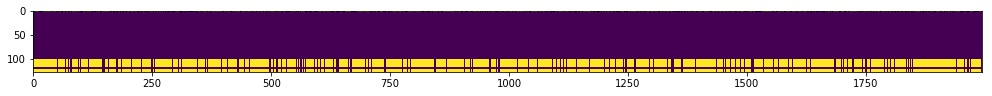

In [8]:
#let's check the nan values!

plt.figure(figsize=(17, 17))
plt.imshow(data.T.isna())
plt.show()

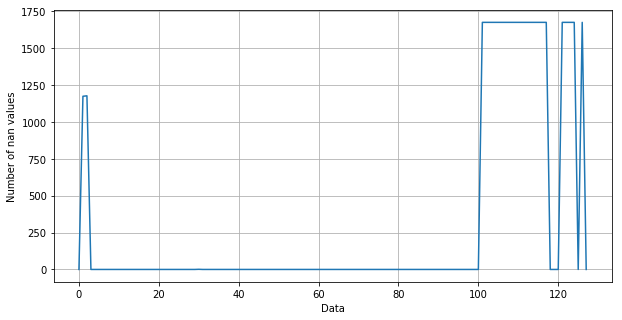

In [9]:
#let's calculate how many nan values we have in each column!

sum_of_nans = []

for i in column_names:
    sum_of_nans.append(data[i].isna().sum())

plt.figure(figsize = (10,5))
plt.plot(sum_of_nans)
plt.xlabel("Data")
plt.ylabel('Number of nan values')
plt.grid()
plt.show()

In [10]:
#as it's seen, either there are more than a 1000 nan values or none - so I decided to remove all the columns with nan values

deleted_nan_data = data

for i in column_names:
    if deleted_nan_data[i].isna().sum() > 0:
        del deleted_nan_data[i]

In [11]:
deleted_nan_data.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,8,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


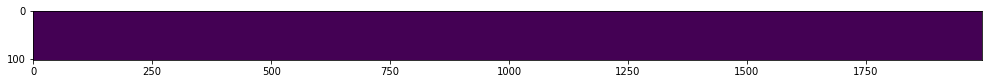

In [12]:
#let's check the data's nan values (we expect 0 nan values)

plt.figure(figsize=(17, 17))
plt.imshow(deleted_nan_data.T.isna())
plt.show()

In [13]:
#let's get the data from the dataframe!

data_array = deleted_nan_data.to_numpy()

#there are some str values in the dataset, we need to convert them to integers!
#let's check the columns containing strings:

list_of_string_indices = []

for i in range(0,len(data_array[0])):
    if type(data_array[0][i]) == str:
        list_of_string_indices.append(i)
        
list_of_string_indices

[1]

In [14]:
#getting the names of columns:

names = np.array(deleted_nan_data.columns)

In [15]:
#luckily we only have one column with strings
#let's convert it into numerics!

community_names = list(data['communityname'])

different_com_names = []

for val in community_names: 
    if val not in different_com_names: 
        different_com_names.append(val)
        
len(different_com_names)

1828

We need to remove the non-predictive columns, which are the first five. After removing the the columns, which have lots of nan values in them, this number is reduced to three - the first three columns.

According to the $communities.names$ file, the very last column tells us the total number of violent crimes per 100K popuation. This will be our $y$ vector, which we also need to remove from the dataset. 

In [16]:
data_lists = []
y_crime_rates = []

for i in range(0,len(data_array)):
    y_crime_rates.append(data_array[i][-1])
    temp = np.delete(data_array[i], [0, 1, 2, len(data_array[0])-1])
    data_lists.append(list(temp))
    
name_list = np.delete(names, [0,1,2,len(data_array[0])-1])

We finally have a dataset to work with. The $data\_array$ vector contains the features, and the $y\_crime\_rates$ the crime rates (the vector to predict). The only thing left to do is fitting the linear regression with 5-fold cross validation.

In [17]:
model = LinearRegression()
scores = cross_val_score(model, data_lists, y_crime_rates, cv=5, scoring = 'r2')
scores

array([0.60723197, 0.63265197, 0.71364481, 0.66551855, 0.61929241])

In [18]:
print('The accuracy:', round(scores.mean(),2), '+/-', round(scores.std()*2,2))

The accuracy: 0.65 +/- 0.08


In [19]:
#we need to do a grid_search to estimate the different parameters for the lasso regularization
#after some thinking, I chose the following parameter ranges:

a_values = np.linspace(0.000006,0.00001, 11)
iterations = [i*100 for i in range(10,12)]

lasso_params = {'alpha':a_values, 'normalize': [False,True], 'max_iter': iterations}
model = GridSearchCV(Lasso(), param_grid=lasso_params, cv = 5, return_train_score = False).fit(data_lists, y_crime_rates)#.best_estimator_,
model

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([6.0e-06, 6.4e-06, 6.8e-06, 7.2e-06, 7.6e-06, 8.0e-06, 8.4e-06,
       8.8e-06, 9.2e-06, 9.6e-06, 1.0e-05]), 'normalize': [False, True], 'max_iter': [1000, 1100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [20]:
#showing the best parameter set:

model.best_estimator_,

(Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=True, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),)

### 3. Shrinkage

* interpret Lasso model's findings based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here (this is an explanatory data analysis problem, be to be creative)

* fit Ridge model and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? If so, do not forget!

In the previous chapter, we found the optimal parameterset for the lasso regularization. Let's check how the coeffitients for the different features look like, when we use a completely different parameter set:

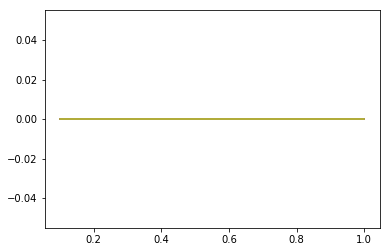

In [21]:
#let's check out the coefficients between 0.1 and 1

all_coeffs = []
alphas = []

for a in np.linspace(0.1, 1, 100):
    alphas.append(a)
    l = Lasso(alpha=a, max_iter=1000)
    l.fit(data_lists, y_crime_rates)
    all_coeffs.append(l.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.plot(alphas, all_coeffs)
plt.show()

As it's seen, the results are not very informative. Let's check out the same plot with the best estimated parameters:

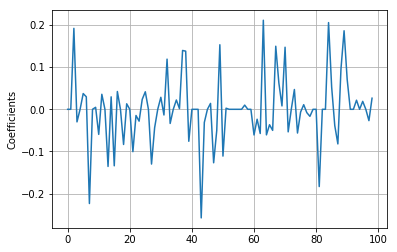

In [22]:
#calling the Lasso regularization with the best estimation:

l = Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=True, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False)
l.fit(data_lists, y_crime_rates)
coeff_lasso = l.coef_

#let's plot the coeffitients in the function of features

plt.plot(coeff_lasso)
#plt.xticks(range(len(name_list)), name_list, rotation=60)
plt.ylabel('Coefficients')
plt.grid()
plt.show()

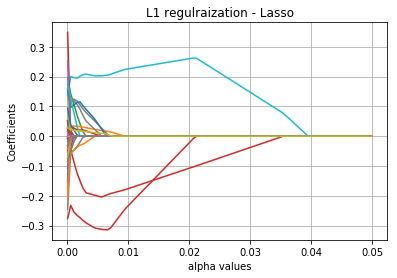

In [23]:
#let's check a range around the estimated best alpha and plot the lasso curve

#let's check out the coefficients between 0.1 and 1

all_coeffs = []
alphas = []

for a in np.linspace(5e-05, 5e-02, 100):
    alphas.append(a)
    l = Lasso(alpha=a, max_iter=1000)
    l.fit(data_lists, y_crime_rates)
    all_coeffs.append(l.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.plot(alphas, all_coeffs)
plt.title('L1 regulraization - Lasso')
plt.ylabel('Coefficients')
plt.xlabel('alpha values')
plt.grid()
plt.show()

In [24]:
#let's check which features have the biggest influence on the recieved values:

list_of_values = []

for i in range(0,len(all_coeffs)-1):
    #print(all_coeffs[40][i])
    if abs(all_coeffs[40][i]) > 0.001:
        list_of_values.append(i)
        
print('The three features, which influence the rates mostly are:')

for i in range(0,len(list_of_values)):
    print()
    print(name_list[list_of_values[i]])

The three features, which influence the rates mostly are:

racePctWhite

PctKids2Par

PctIlleg


In [25]:
#applying the ridge method without normalization

all_coeffs_not_norm = []
alphas_not_norm = []

for a in np.linspace(0.1, 10, 100):
    alphas_not_norm.append(a)
    r = Ridge(alpha=a, normalize=False)
    r.fit(data_lists, y_crime_rates)
    all_coeffs_not_norm.append(r.coef_)
    
all_coeffs_not_norm = np.array(all_coeffs_not_norm)

In [26]:
#applying the ridge method with normalization

all_coeffs_norm = []
alphas_norm = []

for a in np.linspace(0.1, 10, 100):
    alphas_norm.append(a)
    r = Ridge(alpha=a, normalize=True)
    r.fit(data_lists, y_crime_rates)
    all_coeffs_norm.append(r.coef_)
    
all_coeffs_norm = np.array(all_coeffs_norm)

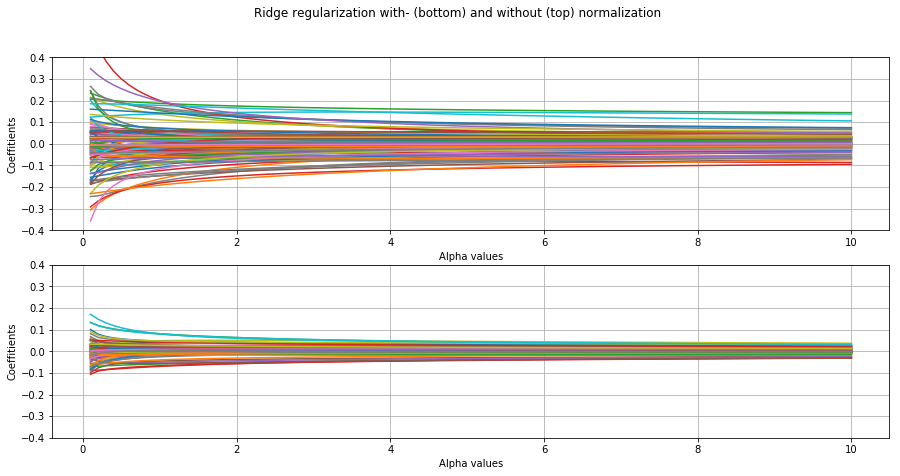

In [27]:
fig, axs = plt.subplots(2, figsize=(15,7))
fig.suptitle('Ridge regularization with- (bottom) and without (top) normalization')

axs[0].plot(alphas_not_norm, all_coeffs_not_norm)
axs[0].grid()
axs[0].set(xlabel='Alpha values', ylabel='Coeffitients', ylim = (-0.4, 0.4))

axs[1].plot(alphas_norm, all_coeffs_norm)
axs[1].grid()
axs[1].set(xlabel='Alpha values', ylabel='Coeffitients', ylim = (-0.4, 0.4))
plt.show()

Interestingly, when we normalize the values, the weights are much closer to each other. This gives us a much better result, than the not normalized one. Due to this reason, I'd always noramlize my data before the Ridge estimation.

### 4. Subset selection

* Split the data to a training and test set and do recursive feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (`RidgeCV`, `LassoCV`, `ElasticNetCV`) on the training set, plot their names and look up some of their meanings (recursive feature elimination is part of `sklearn` but you can do it with a for loop if you whish).

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the `y_test` on 3 different plots, which model seems to be the best?

In [28]:
normed_matrix = normalize(data_lists, axis=1, norm='l1')

In [29]:
#splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(normed_matrix, y_crime_rates, test_size=0.33, random_state=42)

In [30]:
#claculating the reamning 10 features with the ridgecv estimator:

estimator = RidgeCV(normalize = False,cv = 5)
selector_ridge = RFE(estimator, n_features_to_select=10, step=10)
selector_ridge.fit(X_train, y_train)

print('The remaining ten features by the RidgeCV estimator:')
print()

for i in range(len(X_train[0])):
    if selector_ridge.support_[i] == True:
        #print('Feature %d:', name_list[i], ' Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))
        print('Feature',i,':', name_list[i])

The remaining ten features by the RidgeCV estimator:

Feature 2 : racepctblack
Feature 3 : racePctWhite
Feature 15 : pctWInvInc
Feature 42 : PctFam2Par
Feature 43 : PctKids2Par
Feature 44 : PctYoungKids2Par
Feature 45 : PctTeen2Par
Feature 49 : PctIlleg
Feature 70 : HousVacant
Feature 71 : PctHousOccup


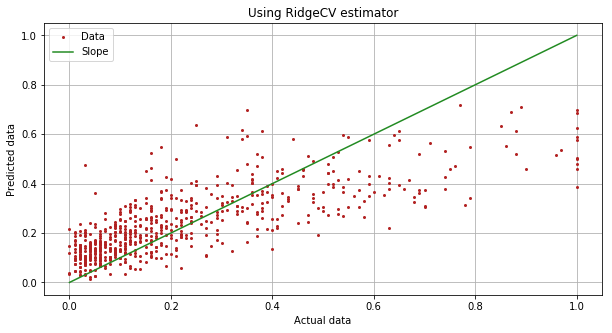

In [31]:
#creating predicted values and plotting the results:

y_test_pred_ridge = selector_ridge.predict(X_test)

line = np.linspace(0,1,len(y_test))

plt.figure(figsize = (10,5))
plt.plot
plt.plot(y_test, y_test_pred_ridge, 'o', color = 'firebrick', markersize = 2, label = 'Data')
plt.plot(line, line, color = 'forestgreen', label = 'Slope')
plt.grid()
plt.title('Using RidgeCV estimator')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.legend()
plt.show()

In [32]:
#claculating the reamning 10 features with the lassocv estimator:

estimator = LassoCV(normalize = False,cv = 5)
selector_LassoCV = RFE(estimator, n_features_to_select=10, step=10)
selector_LassoCV.fit(X_train, y_train)

print('The remaining ten features by the LassoCV estimator:')
print()

for i in range(len(X_train[0])):
    if selector_LassoCV.support_[i] == True:
        #print('Feature %d:', name_list[i], ' Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))
        print('Feature',i,':', name_list[i])

The remaining ten features by the LassoCV estimator:

Feature 0 : population
Feature 2 : racepctblack
Feature 7 : agePct12t29
Feature 15 : pctWInvInc
Feature 38 : MalePctNevMarr
Feature 49 : PctIlleg
Feature 67 : PctPersDenseHous
Feature 70 : HousVacant
Feature 84 : MedRent
Feature 89 : NumStreet


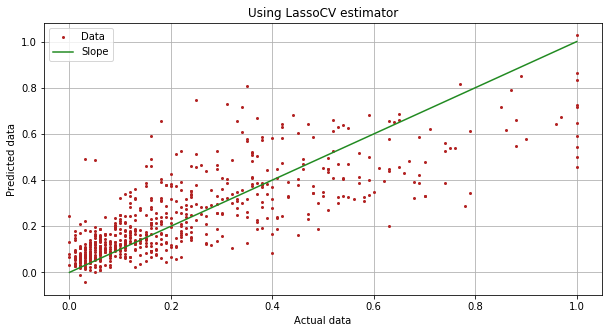

In [33]:
#creating predicted values and plotting the results:

y_test_pred_LassoCV = selector_LassoCV.predict(X_test)

line = np.linspace(0,1,len(y_test))

plt.figure(figsize = (10,5))
plt.plot
plt.plot(y_test, y_test_pred_LassoCV, 'o', color = 'firebrick', markersize = 2, label = 'Data')
plt.plot(line, line, color = 'forestgreen', label = 'Slope')
plt.grid()
plt.title('Using LassoCV estimator')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.legend()
plt.show()

In [34]:
#claculating the reamning 10 features with the elasticnetcv estimator:

estimator = ElasticNetCV(normalize = False,cv = 5)
selector_ElasticNetCV = RFE(estimator, n_features_to_select=10, step=10)
selector_ElasticNetCV.fit(X_train, y_train)

print('The remaining ten features by the ElasticNetCV estimator:')
print()

for i in range(len(X_train[0])):
    if selector_LassoCV.support_[i] == True:
        #print('Feature %d:', name_list[i], ' Selected %s, Rank: %.3f' % (i, selector.support_[i], selector.ranking_[i]))
        print('Feature',i,':', name_list[i])

The remaining ten features by the ElasticNetCV estimator:

Feature 0 : population
Feature 2 : racepctblack
Feature 7 : agePct12t29
Feature 15 : pctWInvInc
Feature 38 : MalePctNevMarr
Feature 49 : PctIlleg
Feature 67 : PctPersDenseHous
Feature 70 : HousVacant
Feature 84 : MedRent
Feature 89 : NumStreet


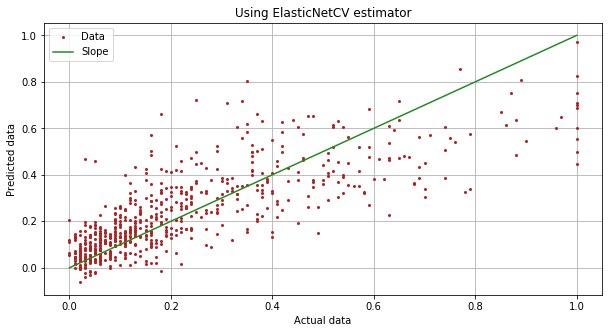

In [35]:
#creating predicted values and plotting the results:

y_test_pred_ElasticNetCV = selector_ElasticNetCV.predict(X_test)

line = np.linspace(0,1,len(y_test))

plt.figure(figsize = (10,5))
plt.plot
plt.plot(y_test, y_test_pred_ElasticNetCV, 'o', color = 'firebrick', markersize = 2, label = 'Data')
plt.plot(line, line, color = 'forestgreen', label = 'Slope')
plt.grid()
plt.title('Using ElasticNetCV estimator')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.legend()
plt.show()

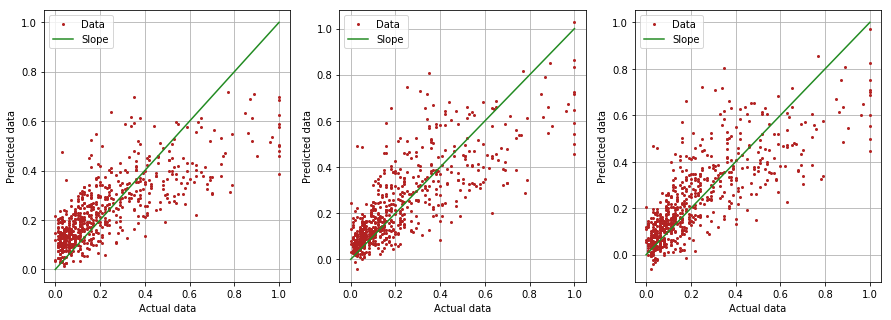

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.plot(y_test, y_test_pred_ridge, 'o', color = 'firebrick', markersize = 2, label = 'Data')
ax1.plot(line, line, color = 'forestgreen', label = 'Slope')
ax1.set(xlabel = 'Actual data', ylabel = 'Predicted data')
ax1.grid()
ax1.legend()

ax2.plot(y_test, y_test_pred_LassoCV, 'o', color = 'firebrick', markersize = 2, label = 'Data')
ax2.plot(line, line, color = 'forestgreen', label = 'Slope')
ax2.set(xlabel = 'Actual data', ylabel = 'Predicted data')
ax2.grid()
ax2.legend()

ax3.plot(y_test, y_test_pred_ElasticNetCV, 'o', color = 'firebrick', markersize = 2, label = 'Data')
ax3.plot(line, line, color = 'forestgreen', label = 'Slope')
ax3.set(xlabel = 'Actual data', ylabel = 'Predicted data')
ax3.grid()
ax3.legend()

plt.show()

All these estimated results seem to be very close to each other. It's unclear for me which one the best is.

### 5. ElasticNet penalty surface

* visualize the surface of the $ objective(\alpha, \beta) $ parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: `from scipy.optimize import minimize`)
    * this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters $\alpha, \beta$

* interpret the findings! do you think linear models are powerful enough on this dataset?

In [37]:
#creating some alpha and beta values

a = np.linspace(0.001, 0.01, 50)
b = np.linspace(0.01, 0.2, 50)

#creating a list for the MSE values

mse_results = []

#we go through all the possible alpha and beta combinations

for a_val in a: 
    mse_b = []
    
    for b_val in b:    
        l1ratio = a_val/(a_val+b_val)

        estimator = ElasticNet(alpha=a_val, l1_ratio=l1ratio, max_iter = 7000)
        estimator.fit(X_train, y_train)

        y_test_pred = estimator.predict(X_test)
        MSE = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
        
        mse_b.append(MSE)
        
    mse_results.append(mse_b)

<IPython.core.display.Javascript object>


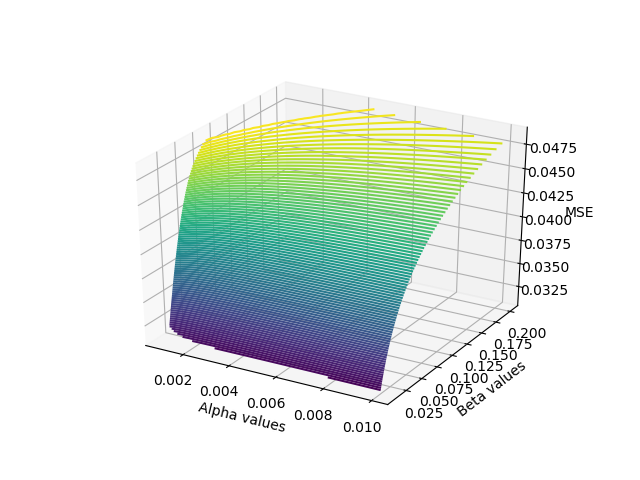

In [38]:
#plotting the resulted MSE values in the function of alpha and beta


%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(a, b, np.array(mse_results), 100)
ax.set_xlabel('Alpha values')
ax.set_ylabel('Beta values')
ax.set_zlabel('MSE');

After getting the MSE surface, the only thing we are left to do with is calculating the MSE value corresponding to the smallest alpha and beta values. We can de this by the following:

In [39]:
min_mse = np.min(np.ndarray.flatten(np.array(mse_results)))

index_of_min_mse = list(np.ndarray.flatten(np.array(mse_results))).index(min_mse)


print('The alpha value corresponding to the smallest MSE: ', a[index_of_min_mse])
print('The beta value corresponding to the smallest MSE: ', b[index_of_min_mse])

The alpha value corresponding to the smallest MSE:  0.01
The beta value corresponding to the smallest MSE:  0.2


After checking the alpha and beta values, I noticed that whatever boundraries I chose, the alpha and beta values were always on the edge. This is false results, however the MSE seems to be correct (after consulting some other classmates). I chose multiple different ranges for both coefficients and the surface always looked similar. In my opinion, given the numbe rof features and the results, a non-linear model would be a bit more powerful than a linear model. 